<div class="frontmatter text-center">
<h1> Introduction to Data Science and Programming</h1>
<h2>Lecture 21: Network analyis and visualization</h2>
<h3>IT University of Copenhagen, Fall 2020</h3>
<h3>Instructor: Michael Szell</h3>
</div>

# Source
This notebook was adapted from:
* A network science class by Sean Cornelius and Emma Thompson

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Getting started: reading in an edge list

Read in the file `test.txt` with the following options
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

In [2]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('files/test.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Allowed formats
* Node pairs with no data  
`1 2`
* Node pairs with python dictionary  
`1 2 {weight:7, color:"green"}`

# Basic analysis
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [3]:
N = len(G)
L = G.size()
degrees = [d for _, d in G.degree()]
kmin = min(degrees)
kmax = max(degrees)

In [4]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  443
Number of edges:  540

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1
Maximum degree:  8


# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

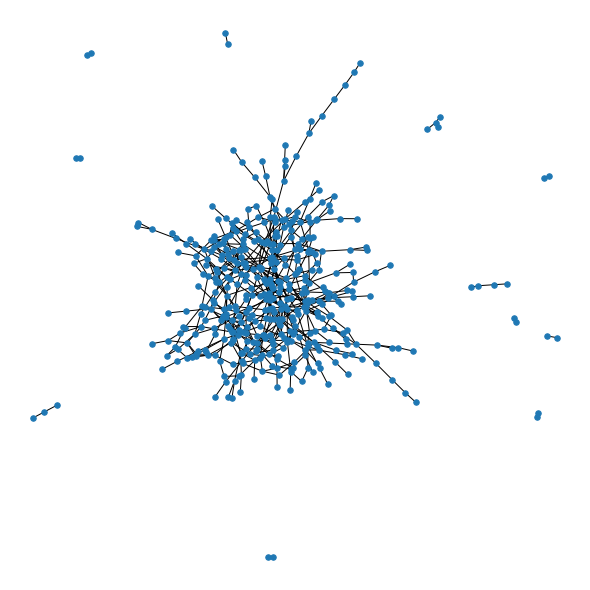

In [5]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=30)

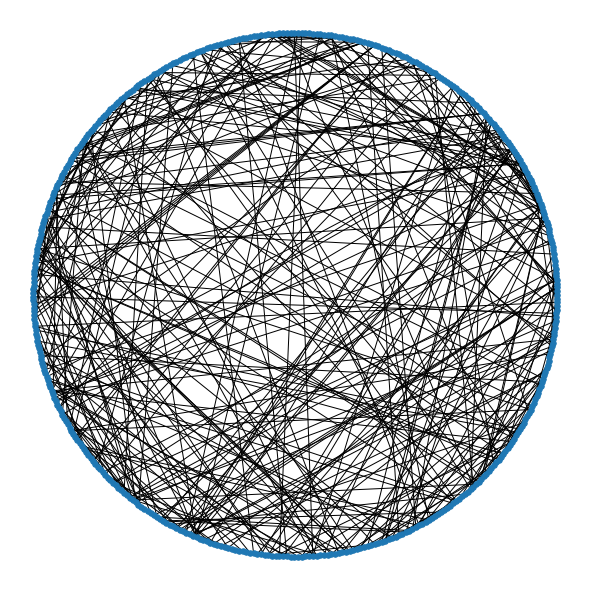

In [6]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=30)

# Plotting the degree distribution

Let's plot it in log scale first with log-binning, using `np.logspace` and `np.histogram`:

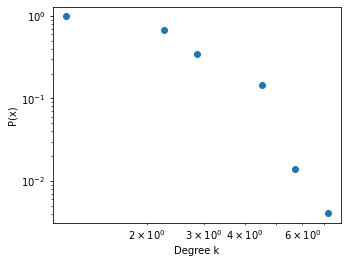

In [7]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

logbins = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
h, binedges = np.histogram(degrees,  bins=logbins, density=True) # We use np.histogram to make the binning calculations. Plotting is done with axes.plot below.
binmidpoints = (binedges[1:] + binedges[:-1]) / 2

axes.plot(binmidpoints, h, "o")
axes.set_xlabel("Degree k")
axes.set_ylabel("P(x)")
axes.set_xscale('log') 
axes.set_yscale('log') 

This is clearly not a network with anything like a heavy-tailed degree distribution.
So let's plot it in linear scale without any binning:

Counter({2: 153, 1: 113, 3: 99, 4: 43, 5: 23, 6: 8, 7: 3, 8: 1})
dict_items([(5, 0.05191873589164785), (2, 0.345372460496614), (4, 0.09706546275395034), (3, 0.2234762979683973), (1, 0.255079006772009), (8, 0.002257336343115124), (6, 0.01805869074492099), (7, 0.006772009029345372)])


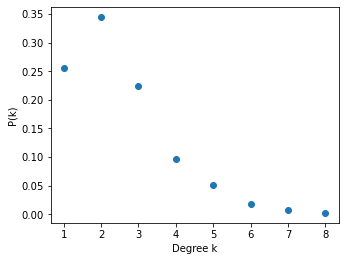

In [8]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

# See: https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
from collections import Counter
degree_sequence = [d for _, d in G.degree()]  # degree sequence
degreeCount = Counter(degree_sequence)
print(degreeCount) # print for teaching

# Normalize
total = sum(degreeCount.values())
for key in degreeCount:
    degreeCount[key] /= total
print(degreeCount.items()) # print for teaching
    
deg, prob = zip(*degreeCount.items()) # unpacks the first tuple elements into deg, unpacks the second tuple elements into prob


axes.plot(deg, prob, "o")
axes.set_xlabel("Degree k")
axes.set_ylabel("P(k)");

# Network visualization with Netwulf

It's a very new package (right now version v0.1.5) developed by Ben Maier and Ulf Aslak, so use with caution: https://pypi.org/project/netwulf/

That being said, many people are already using it because of its easy controls and Jupyter notebook integration.
Install: `pip install netwulf`

In [10]:
import netwulf as wulf

G = nx.barabasi_albert_graph(100,m=1)
stylized_network, config = wulf.visualize(G)